<a href="https://colab.research.google.com/github/Jenny2305/PARCIAL-ESTAD-STICA-2/blob/main/parcial_te%C3%B3rico_3_copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files # Para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns
import scipy.stats as stats
import math

# **Estadística descriptiva para datos cualitativos**


---

El presente trabajo tiene como objetivo aplicar herramientas de estadística descriptiva para analizar de forma crítica y sistemática una muestra extraída de la base de datos “Estadísticas Vitales de Nacimientos - 2023” del DANE. A partir de variables cualitativas como el tiempo de gestación y la talla al nacer, se desarrollan procedimientos estadísticos fundamentales como la limpieza de datos, la categorización de variables, el cálculo de proporciones y la representación gráfica mediante diagramas de barras y gráficos de torta.

Este análisis permite no solo reforzar competencias técnicas en el manejo de librerías estadísticas de Python como Pandas, Matplotlib, Seaborn y NumPy, sino también construir una visión crítica frente a fenómenos demográficos reales en el contexto colombiano. Así, se logra establecer patrones relevantes en torno al comportamiento de los nacimientos según el tiempo de gestación, destacando su importancia para la toma de decisiones en salud pública, planificación familiar y políticas de maternidad y niñez.

El trabajo también integra aspectos metodológicos importantes como la recategorización semántica de datos, la exclusión de registros faltantes o codificados como “sin información”, y el análisis de tablas de contingencia, permitiendo una aproximación más precisa y representativa del fenómeno analizado.



# **Descripción de la base de datos**


---
Esta base de datos contiene información detallada sobre los nacimientos ocurridos en Colombia durante el año 2023. Los datos provienen de los Certificados de Nacido Vivo, los cuales son diligenciados por profesionales de la salud (médicos, enfermeras, auxiliares de enfermería, promotores de salud) y funcionarios del Registro Civil en el momento del nacimiento, ya sea en formato físico o digital. La información recopilada incluye variables como: Departamento y municipio de nacimiento, área del nacimiento (urbana o rural), sexo del nacido vivo, peso y talla al nacer, tiempo de gestación, tipo de parto, atención recibida durante el parto y datos de la madre y del padre. En total, la base de datos cuenta con 515,549 registros y 39 variables.



Es importante destacar que esta base de datos no se basa en un muestreo estadístico, sino en un registro exhaustivo de eventos vitales. Esto significa que se busca capturar la totalidad de los nacimientos ocurridos en el país durante el año 2023, sin seleccionar una muestra representativa. Sin embargo, para fines de evaluación de la calidad de los datos, el DANE selecciona una muestra representativa de certificados de nacido vivo. Esta muestra se utiliza para revisar y construir indicadores de calidad y exhaustividad en los procesos de diligenciamiento y codificación.


#Estadística descriptiva para variables cualitativas
* Gráficos para datos de una cualitativas.
* Proporciones asociadas a los valores de una variable cualitativa.


In [ ]:
uploaded = files.upload()


Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [ ]:
tabla1=tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
df2 = tabla1[(tabla1["T_GES"] != 9) & (tabla1["T_GES"] != 6) & (tabla1["TALLA_NAC"] != 9)] #ver minuto 10 para este caso en que no encontre datos sin información
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-9-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


,T_GES
COD_DPTO,
23,4
11,4


In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"], df2.loc[(df2.T_GES == "2"), "T_GES"], df2.loc[(df2.T_GES =="3"), "T_GES"] ="Menos de 22", "22-27", "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"], df2.loc[(df2.T_GES == "5"), "T_GES"], df2.loc[(df2.T_GES =="6"), "T_GES"], df2.loc[(df2.T_GES =="9"), "T_GES"] ="38-41", "42 y más", "ignorado", "sin información"


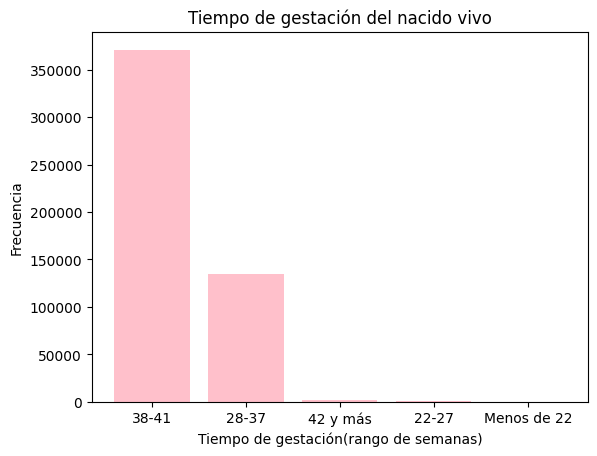

In [ ]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title('Tiempo de gestación del nacido vivo')
ax = plt.subplot()
ax.set_xlabel('Tiempo de gestación(rango de semanas)')
ax.set_ylabel('Frecuencia')
plt.show()

El valor  de 38 a 41 semanas es el rango de tiempo de gestación donde se tienen alrededor de 350000 nacidos vivos, y es donde se tienen más bebés nacidos vivos. En el rango de tiempo de 28 a 37 semanas se tiene aproximadamente 100000 nacidos vivos. Los rangos de tiempos de  42 y más semanas, 22 a 27 semanas, menos de 22 semanas tienen menos de 50000 nacidos vivos en Colombia.

In [ ]:
sizes = np.array(y_values)
sizes

array([371090, 134513,   1950,    477,     19])

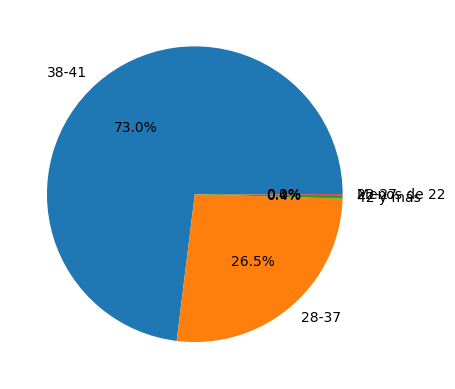

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [ ]:
len(df2.T_GES)

508049

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)


['38-41' '28-37' '42 y más' '22-27' 'Menos de 22']
[73.04216719253458, 26.476383183511825, 0.38382124558851605, 0.09388858161319086, 0.0037397967518881053]


Aproximadamente el el 73.04% de los nacidos vivos en Colombia tuvieron entre 38 a 41 semanas de gestación, el 26.5% entre 28 a 47 semanas, el 0.4% entre 42 y más semanas, el 0.1% entre 22 a 27 semanas, y el 0.004% menos de 22 semanas.

La variable T_GES representa el tiempo de gestación de los nacidos vivos y se categoriza en rangos semanales como:

1= Menos de 22 semanas

2= 22-27 semanas

3= 28-37 semanas

4= 38-41 semanas

5= 42 y más semanas

Tras limpiar los datos eliminando los registros con valores ignorados o sin información, se observa a través de gráficos de barras y diagramas de pastel que la mayoría de los nacimientos se concentran en el rango 4 de 38 a 41 semanas. Dicho grupo representa el mayor porcentaje del total, seguido por los nacimientos prematuros correspondiente al rango 3 de 28 a 37 semanas.

# Tablas de contigencia
* Representación gráfica de una tabla de contingencia.
* Proporciones a una tabla de contingencia.


In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"], df2.loc[(df2.T_GES == "2"), "T_GES"], df2.loc[(df2.T_GES =="3"), "T_GES"] ="Menos de 22", "22-27", "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"], df2.loc[(df2.T_GES == "5"), "T_GES"], df2.loc[(df2.T_GES =="6"), "T_GES"], df2.loc[(df2.T_GES =="9"), "T_GES"] ="38-41", "42 y más", "ignorado", "sin información"
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC =="3"), "TALLA_NAC"] ="Menos de 20", "20-29", "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC =="6"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC =="9"), "TALLA_NAC"] ="40-49", "50-59", "60 y más", "sin información"
df2.TALLA_NAC = df2.TALLA_NAC.astype(str) #creo este código no es necesario para nosotros ya que utiliza son números(excepto la categoría 6
df2.head(3)

<ipython-input-16-b7c81a91f599>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Menos de 20' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC =="3"), "TALLA_NAC"] ="Menos de 20", "20-29", "30-39"
<ipython-input-16-b7c81a91f599>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str) #creo este código no es necesario para nosotros ya que utiliza son números(excepto la categoría 6


,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,5
11,38-41,4
11,38-41,4


In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2["TALLA_NAC"])
tabla_cont

TALLA_NAC,1,2,3,4,5,6
T_GES,,,,,,
22-27,2,251,1646,50,1,0
28-37,0,44,3357,95455,35657,0
38-41,0,0,46,140106,230919,19
42 y más,0,0,0,116,360,1
Menos de 22,2,11,5,0,1,0


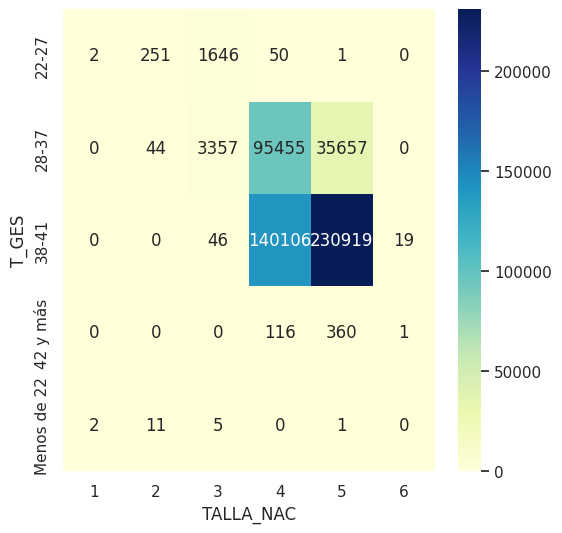

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

# Probabilidades condicionales

Realizamos algunas pruebas de probabilidades condicionales utiliando la tabla de contingencia y obtuvimos los siguientes resultados:

$P(22-27|Talla 1) = 0,5$

El 50\% de los recien nacidos que se sabe que nacen con Talla 1, tienen un tiempo de gestación de 22-27 semanas.

$P(22-27|Talla 3) = 0,3256$

El 32\% de los recien nacidos que se sabe que nacen con Talla 3, tienen un tiempo de gestación de 22-27 semanas.

$P(38-41|Talla 4) = 0,5943$

El 59\% de los recien nacidos que se sabe que nacen con Talla 4, tienen un tiempo de gestación de 34-41 semanas.

$P(38-41|Talla 5) = 0,865$

El 86\% de los recien nacidos que se sabe que nacen con Talla 5, tienen un tiempo de gestación de 34-41 semanas.

$P(Talla 1|Menos de 22) = 0,1052$

El 10\% de los recien nacidos que se sabe que nacen con Talla 1, tienen un tiempo de gestación de menos de 22 semanas.

$P(Talla 4|28-37) = 0,7096$

El 70\% de los recien nacidos que se sabe que nacen con Talla 4, tienen un tiempo de gestación de 28-37 semanas.

$P(Talla 5|28-37) = 0,265$

El 26\% de los recien nacidos que se sabe que nacen con Talla 5, tienen un tiempo de gestación de 28-37 semanas.

$P(Talla 2|38-41) = 0,0$

El 0\% de los recien nacidos que se sabe que nacen con Talla 2, tienen un tiempo de gestación de 38-41 semanas.

# Prueba Chi Cuadrado.

*   Hipotesis nula: X y Y no están asociadas.
*   Hipotesis alternativa: X y Y están asociadas.


In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"el valor de la estdistica Chi cuadrado es: {chi} y el valor de p es de: {valor_p}")

el valor de la estdistica Chi cuadrado es: 283544.78878571023 y el valor de p es de: 0.0


* Si valor p < 0.05 se rechaza la hipótesis nula
* Si valor p > 0.05 no se rechaza la hipótesis nula

Como valor de p es menor a 0,05 por lo tanto se rechaza la hipótesis nula

Es decir **no** se rechaza con una confianza el 95% que la talla de los recién nacidos está asociada con el tiempo de gestación.


In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi+len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)* min(5-1, 6-1)))
print(f"los coeficientes de contingencia, Phi y V de cramer estan dados por: {coeficiente_contingencia} , {coeficiente_phi} y {coeficiente_v_cramer}")

los coeficientes de contingencia, Phi y V de cramer estan dados por: 0.5984937865548654 , 0.7470643881626543 y 0.37353219408132715


De acuerdo con el articulo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. Biometrics, 33(1), 159–174. [Link](https://www.jstor.org/stable/2529310)

Interpretación general

* Y depende ____ de X
* X y Y son ____ homogéneas
* X y Y están ____ asociadas

Donde
____ = nula ($\text{Chi}, \text{phi}, \text{V} \approx 0$),
____ = insignificantemente ($0 < \text{Chi}, \text{phi}, \text{V} < 0.2$),
____ = discretamente ($0.2 < \text{Chi}, \text{phi}, \text{V} < 0.4$),
____ = moderadamente, ($0.4 < \text{Chi}, \text{phi}, \text{V} < 0.6$),
____ = sustancialmente ($0.6 < \text{Chi}, \text{phi}, \text{V} < 0.8$)
y ____ = fuertemente ($0.8 < \text{Chi}, \text{phi}, \text{V} < 1$).


Por lo tanto el coeficiente **contingencia** nos indica una asociación **moderada**, el coeficiente **phi** nos indica una asociación **sustancial**, y el coeficiente de **cramer** nos indica una asociación **discreta**.




La mayoría de los nacidos vivos en Colombia presentan una talla de nacimiento dentro de un rango normal, con valores frecuentes entre 48 y 52 centímetros.
Para asegurar la calidad de los datos, fueron eliminados los vaores extremos; por lo cual, el comportamiento de dicha variable muestra una dustribución centrada en valores típicos de talla neonatal.


Las variables T_GES que representa el tiempo de gestación y la variable TALLA_NAC que representa la talla de nacimiento de un recipen nacido vivo en Colombia se encuentran relacionada: a mayor tiempo de gestación, mayor tiende a ser la talla del recién nacido. Dicha realción es positiva y moderada, ya que los nacidos prematuros (antes de la semana número 38 de gestación, correspoindiente a los rangos 3, 2 y 1 ) suelen tener menor talla, mientras que los nacidos a término (rango 4 correspondiente a 38 a 41 semanas) o postérmino (rango 5 correspondiente a 42 y más semanas) suelen tener tallas mayores.

# **Conclusiones**


---
El análisis evidenció que el rango de 38 a 41 semanas de gestación concentra más del 73% de los nacidos vivos, lo que indica que la mayoría de los embarazos en Colombia concluyen dentro del periodo considerado normal o a término.
Los rangos extremos (menos de 22 semanas y más de 42) tienen frecuencias considerablemente menores, lo cual es coherente con los riesgos clínicos asociados a embarazos prematuros o prolongados, y destaca la necesidad de atención médica especializada en estos casos.

La limpieza de datos y la recategorización fueron pasos esenciales para garantizar la validez del análisis. Al eliminar registros codificados como “sin información”, se pudo trabajar con una muestra depurada y confiable.

Las gráficas de barras y de pastel facilitaron la comprensión de la distribución de los datos, permitiendo representar con claridad las proporciones relativas y absolutos de cada categoría de gestación.

Este trabajo refleja el desarrollo de habilidades en análisis estadístico aplicado con soporte computacional, fortaleciendo el pensamiento lógico, crítico y científico, así como la capacidad de interpretar fenómenos sociales a partir de datos cualitativos.


# **Referencias**


---
1. Bibliografía:DANE (2024). Estadísticas Vitales de Nacimientos 2023.https://microdatos.dane.gov.co
2. Triola, M. F. (2019). Estadística (13.ª ed.). Pearson Educación.
3. Martínez González, M. A. (2006). Estadística Aplicada a las Ciencias de la Salud. Elsevier España.